In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
#load the training dataset
train_data = pd.read_csv("../data/train.csv")

#Display the first 5 rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Load the test dataset
test_data= pd.read_csv("../data/test.csv")

#Display the first 5 rows
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Get overview of training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Checking for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Getting summary statistics for numeric columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Getting summary of all columns
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## What Do Labels Reperesent

- **Survived**: Passenger survived or not (0 = Not Survived, 1 = Survived)
- **Pclass**: Class of Passengers (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex**: Gender of Passenger
- **Age**: Age of passenger
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Fare**: Ticket fare
- **Embarked**: Port where the passenger embarked (C = Cherburg, Q = Queenstown, S = Southampton)

## Initial Observations

### Missing Values:
*[Based on results from .isnull().sum()]* 
- `Age`: Contains missing values. It's a crticial feature for analysis, need to fill in missing values
- `Cabin`: A large ammount of values are missing. This feature is most likely not needed unless patterns can be identified
- `Embarked`: Contains some missing values, could be filled in using the most frequent values?

### Categorical Features:
*[Based on results from .describe(include="all")]*
- `Sex`: Contains two unique calues (`male`, `female`)
- `Embarked`: Contains three unique values (`C`, `Q`, `S`)
- **Both thes features need need to be encoded into numeric values for modeling to work**

### Potentially Irrelevant Features:
- `PassengerId`: Likely irrelevant to survival, so it can be dropped
- `Name`: Names wouldn't have an impact on survivability, however may have valuable information (specific titles maybe?). Would require encoding
- `Ticket`: No immediate releveance can be discerned. This feature will be dropped
- `Fare`:


In [8]:
# Count values for eaach target class
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
#Calculate percentage oof each target class
train_data["Survived"].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

## Target Dsitribution

### Distribtuion (Raw Counts):
- 0 (Did not survive): 549 passengers did not survive (61.6%)
- 1 (did survive): 342 passengers did survive (38.4%)

### Observations:
- At first glance the data set is slightly imbalanced with more passenger not surviving compared to those who did not survive
- This imbalance is not extreme, however it can still influence machine learning models. Careful evaluation of model performance of both classes is required

In [10]:
#Reloading original dataset due to personal error:
train_data = pd.read_csv("../data/train.csv")

In [11]:
#Drop PassengerId column
train_data = train_data.drop(columns=['PassengerId'])

In [12]:
#Drop Ticket column
train_data = train_data.drop(columns=['Ticket'])

In [13]:
#Drop Fare column
train_data = train_data.drop(columns=['Fare'])

In [14]:
# Drop the Cabin column
train_data = train_data.drop(columns=['Cabin'])

In [15]:
# Calculate percentage of missing values for each column
missing_percentage = train_data.isnull().sum() / len(train_data) * 100

# Display missing percentage
print(missing_percentage)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Embarked     0.224467
dtype: float64


In [16]:
# Fill missing Age values with the median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [17]:
# Fill missing Embarked values with the mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [18]:
# Verify there are no missing values left
train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

### Handling Missing Data:

1. **Age**:
   - Missing values: 177
   - Filled missing values with the median (`Age` is a critical feature, and using median avoids bias from outliers).

2. **Cabin**:
   - Missing values: 687 (over 77% of the data is missing).
   - Dropped this column due to excessive missing values and lac of relavance to survival.

3. **Embarked**:
   - Missing values: 2
   - Filled missing values with the mode (`S`, the most frequent value, to preserve distribution).


In [19]:
#Sumary statistics for numeric columns
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [20]:
#Summary of categorical features
train_data.describe(include="object")

,Name,Sex,Embarked
count,891,891,891
unique,891,2,3
top,"Dooley, Mr. Patrick",male,S
freq,1,577,646


In [21]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [22]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
train_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
train_data['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [25]:
train_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [26]:
train_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [27]:
train_data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [28]:
# Compare age distribution for survived vs. not survived
train_data[['Age', 'Survived']].groupby('Survived').describe()

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         549.0  30.028233  12.499986  1.00  23.0  28.0  35.0  74.0
1         342.0  28.291433  13.764425  0.42  21.0  28.0  35.0  80.0

<function matplotlib.pyplot.show(close=None, block=None)>

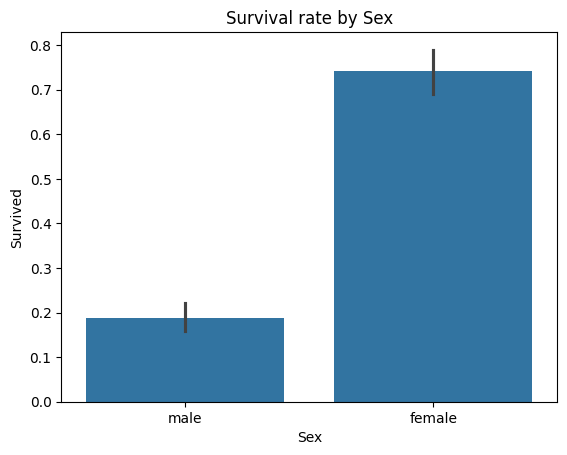

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

#Bar plot for survival by sex
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival rate by Sex')
plt.show

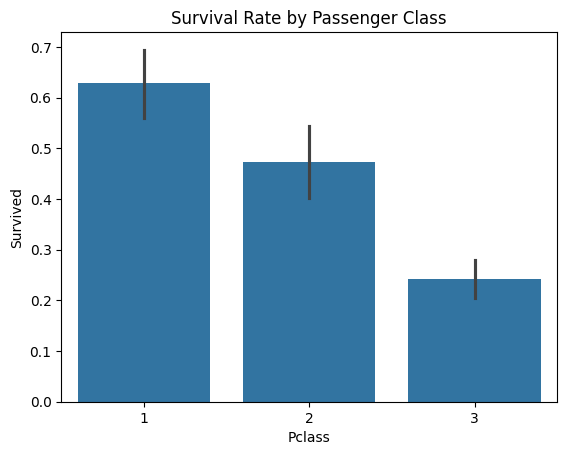

In [30]:
#Bar plot for survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

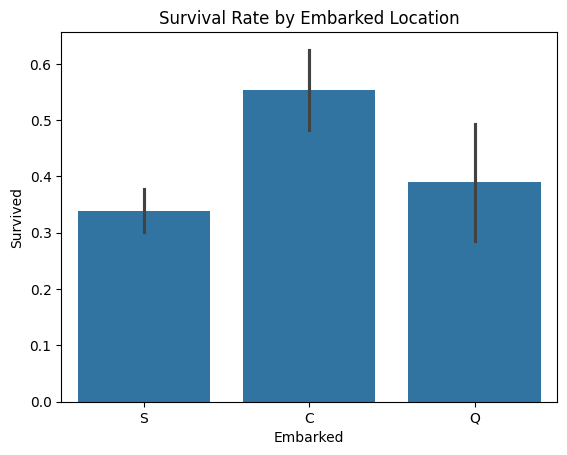

In [31]:
# Bar plot for survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked Location')
plt.show()

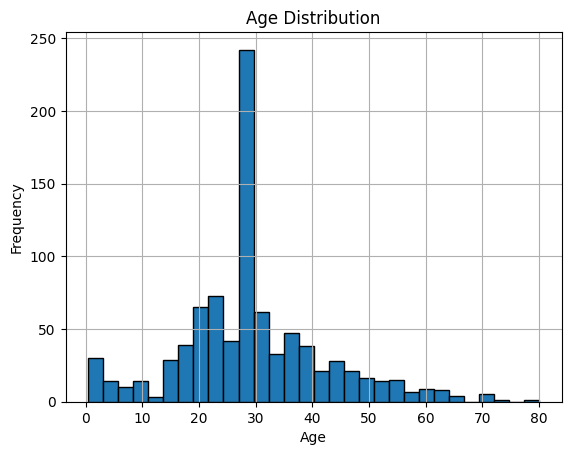

In [32]:
#Histogram of Age
train_data['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

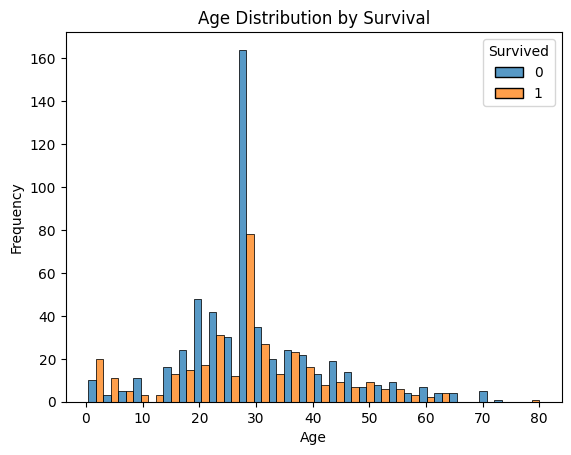

In [33]:
# Histogram of Age by Survival
sns.histplot(data=train_data, x='Age', hue='Survived', bins=30, multiple='dodge', kde=False)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### EDA Conclusions:
1. **Influential Features**:
   - `Sex`: Women had a significantly higher survival rate.
   - `Pclass`: First-class passengers had much higher survival rates compared to second- and third-class passengers.
   - `Embarked`: Passengers who embarked at Cherbourg (`C`) had a higher survival rate.
   - `Age`: Younger passengers (e.g., children) had higher survival rates

2. **Feature Engineering Ideas**:
   - Create a `FamilySize` feature by combining `SibSp` and `Parch`.
   - Extract titles from the `Name` column (e.g., `Mr.`, `Mrs.`, `Miss`).

3. **Data Processing Required**:
   - Encode categorical variables (`Sex`, `Embarked`).
   - Scale numerical features (`Age`, `Fare`) for model consistency.


In [34]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [35]:
train_data.groupby('FamilySize')['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [36]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

title_counts = train_data['Title'].value_counts()
print(title_counts)

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [37]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')

train_data['Title'] = train_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

In [38]:
#Encode Sex
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [39]:
#Encode Embarked
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q':1, 'S': 2})

In [40]:
#Encode Title
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare':4}
train_data['Title'] = train_data['Title'].map(title_mapping)

In [41]:
# Scaling Age (Doing due to large ranges)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['Age']] = scaler.fit_transform(train_data[['Age']]) 

In [42]:
#Splitting Data

from sklearn.model_selection import train_test_split

#Define features and target
X = train_data.drop(['Survived', 'Name'], axis=1)
Y = train_data['Survived']

#Split into training and validation sets (80% train, 20% validate0)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

##Several errors have been pointed out, need to be fixed. Then will try retraining model

LogisticRegression()

In [44]:
#Checking if all categorical values have been encoded (n

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    int64  
 1   Sex         712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Embarked    712 non-null    int64  
 6   FamilySize  712 non-null    int64  
 7   Title       712 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 50.1 KB
None


In [45]:
#Remap 'Sex'

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [46]:
print(train_data['Sex'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Sex, dtype: float64


In [47]:
#verifying 'Sex" column
print(train_data['Sex'].unique())

[nan]


In [48]:
print(train_data.head()) # Display first few rows
print(train_data.columns)

   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris  NaN   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  NaN   
2         1       3                             Heikkinen, Miss. Laina  NaN   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  NaN   
4         0       3                           Allen, Mr. William Henry  NaN   

        Age  SibSp  Parch  Embarked  FamilySize  Title  
0 -0.565736      1      0         2           2      0  
1  0.663861      1      0         0           2      2  
2 -0.258337      0      0         2           1      1  
3  0.433312      1      0         2           2      2  
4  0.433312      0      0         2           1      0  
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked', 'FamilySize', 'Title'],
      dtype='object')


In [49]:
#Have to reload the datset :(

original_data = pd.read_csv("../data/train.csv")

In [50]:
print(original_data.head())
print(original_data.columns)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

In [51]:
#Extract original 'Sex' column (thank the lord)

train_data['Sex'] = original_data['Sex']

In [52]:
print(train_data.head())
print(train_data.columns)

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex       Age  SibSp  Parch  Embarked  FamilySize  Title  
0    male -0.565736      1      0         2           2      0  
1  female  0.663861      1      0         0           2      2  
2  female -0.258337      0      0         2           1      1  
3  female  0.433312      1      0         2           2      2  
4    male  0.433312      0      0         2           1      0  
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked', 'FamilySize', 'Title'],
      dtype='object')


In [53]:
#Finally rencoding 'Sex'column properly

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [54]:
print(train_data['Sex'].unique())

[0 1]


### Bugfix

- Sex column was restored using original data however there are several inconsistencies in the data set
- Embarked is still Object Types:
    - need to be encoded as numerical values.
- Duplicated Column Names (Emabarked and Embarked)
    - Personal error during preprocessing where duplicate or misspelled column names were created.


In [55]:
#Drop incorrectly named columns
train_data = train_data.drop(columns=['Emabarked'], errors='ignore')

In [56]:
print(train_data.head())
print(train_data.columns)

   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

        Age  SibSp  Parch  Embarked  FamilySize  Title  
0 -0.565736      1      0         2           2      0  
1  0.663861      1      0         0           2      2  
2 -0.258337      0      0         2           1      1  
3  0.433312      1      0         2           2      2  
4  0.433312      0      0         2           1      0  
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked', 'FamilySize', 'Title'],
      dtype='object')


In [57]:
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [58]:
print(train_data['Embarked'].isnull().sum())  

891


In [59]:
#Extract original 'Embarked' column
train_data['Embarked'] = original_data['Embarked']

In [60]:
# Fill missing values with the mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [61]:
# Map 'C', 'Q', 'S' to numeric values
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [62]:
print(train_data['Embarked'].isnull().sum())  # Should output 0 (PLEASE WORK)
print(train_data['Embarked'].unique())     

0
[2 0 1]


In [63]:
#Splitting Data

from sklearn.model_selection import train_test_split

#Define features and target
X = train_data.drop(['Survived', 'Name'], axis=1)
y = train_data['Survived']

#Split into training and validation sets (80% train, 20% validate0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.79


In [66]:
#Display test_data test
print(test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [67]:
#Drop PassengerId column
test_data = test_data.drop(columns=['PassengerId'])

#Drop ticket column
test_data = test_data.drop(columns=['Ticket'])

#Drop Fare column
test_data = test_data.drop(columns=['Fare'])

#Drop cabin column
test_data = test_data.drop(columns=['Cabin'])

In [68]:
print(test_data.head())

   Pclass                                          Name     Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

   Parch Embarked  
0      0        Q  
1      0        S  
2      0        Q  
3      0        S  
4      1        S  


In [69]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])


In [70]:
test_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [71]:
print(test_data.head())

   Pclass                                          Name     Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

   Parch Embarked  
0      0        Q  
1      0        S  
2      0        Q  
3      0        S  
4      1        S  


In [72]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [73]:
print(test_data.head())

   Pclass                                          Name     Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

   Parch Embarked  FamilySize  
0      0        Q           1  
1      0        S           2  
2      0        Q           1  
3      0        S           1  
4      1        S           3  


In [74]:
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

test_title_counts = test_data['Title'].value_counts()
print(test_title_counts)

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [78]:
test_rare_titles = ['Col', 'Dr', 'Rev', 'Dona']
test_data['Title'] = test_data['Title'].replace(test_rare_titles, 'Rare')

test_data['Title'] = test_data['Title'].replace(['Ms'], 'Miss')

In [79]:
print(test_data.head())

   Pclass                                          Name     Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

   Parch Embarked  FamilySize Title  
0      0        Q           1    Mr  
1      0        S           2   Mrs  
2      0        Q           1    Mr  
3      0        S           1    Mr  
4      1        S           3   Mrs  


In [80]:
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [81]:
print(test_data.head())

   Pclass                                          Name  Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    0  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)    1  47.0      1   
2       2                     Myles, Mr. Thomas Francis    0  62.0      0   
3       3                              Wirz, Mr. Albert    0  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.0      1   

   Parch Embarked  FamilySize Title  
0      0        Q           1    Mr  
1      0        S           2   Mrs  
2      0        Q           1    Mr  
3      0        S           1    Mr  
4      1        S           3   Mrs  


In [82]:
print(test_data['Sex'].unique())

[0 1]


In [84]:
print(test_data['Sex'].isnull().sum())

0


In [86]:
print(test_data['Embarked'].unique())

['Q' 'S' 'C']


In [87]:
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q':1, 'S': 2})

In [88]:
print(test_data.head())

   Pclass                                          Name  Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    0  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)    1  47.0      1   
2       2                     Myles, Mr. Thomas Francis    0  62.0      0   
3       3                              Wirz, Mr. Albert    0  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.0      1   

   Parch  Embarked  FamilySize Title  
0      0         1           1    Mr  
1      0         2           2   Mrs  
2      0         1           1    Mr  
3      0         2           1    Mr  
4      1         2           3   Mrs  


In [89]:
print(test_data['Embarked'].unique())

[1 2 0]


In [90]:
print(test_data['Sex'].isnull().sum())

0


In [91]:
print(test_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [92]:
test_title_mapping= {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare':4}
test_data['Title'] = test_data['Title'].map(test_title_mapping)

In [93]:
print(test_data.head())

   Pclass                                          Name  Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    0  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)    1  47.0      1   
2       2                     Myles, Mr. Thomas Francis    0  62.0      0   
3       3                              Wirz, Mr. Albert    0  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.0      1   

   Parch  Embarked  FamilySize  Title  
0      0         1           1      0  
1      0         2           2      2  
2      0         1           1      0  
3      0         2           1      0  
4      1         2           3      2  


In [94]:
print(test_data['Title'].unique())

[0 2 1 3 4]


In [95]:
print(test_data['Title'].isnull().sum())

0


In [96]:
print("Min Age:", test_data['Age'].min())
print("Max Age:", test_data['Age'].max())

Min Age: 0.17
Max Age: 76.0


In [97]:
print(test_data['Age'].describe())

count    418.000000
mean      29.599282
std       12.703770
min        0.170000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64


In [98]:
test_data[['Age']] = scaler.transform(test_data[['Age']])

In [99]:
X_test = test_data.drop(['Name'], axis=1)
X_test[['Age']] = scaler.transform(X_test[['Age']])

In [100]:
print(X_test.columns)  
print(X_train.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'FamilySize',
       'Title'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'FamilySize',
       'Title'],
      dtype='object')


In [101]:
# Generate predictions on the test dataset
test_predictions = model.predict(X_test)

# Store predictions in the test dataset
test_data['Survived'] = test_predictions

print("Test predictions completed and saved!")

Test predictions completed and saved!


In [102]:
print(test_data[['Survived']].head())

   Survived
0         0
1         1
2         0
3         0
4         1


In [103]:
print("Training Data (First 5 Rows):")
print(train_data[['Survived']].head())

print("\nTest Data Predictions (First 5 Rows):")
print(test_data[['Survived']].head())

Training Data (First 5 Rows):
   Survived
0         0
1         1
2         1
3         1
4         0

Test Data Predictions (First 5 Rows):
   Survived
0         0
1         1
2         0
3         0
4         1
